In [37]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.decomposition import NMF

from sonnmf.utils import calculate_gscore

np.random.seed(42)
np.set_printoptions(precision=3)

In [38]:
def plot_separate_H(H, img_size, figsize, fontsize, num_rows=4, normalize_row=False, filename=None):
    rank = H.shape[0]
    if normalize_row:
        H /= np.linalg.norm(H, axis=1, keepdims=True)
    H3d = H.reshape(-1, img_size[0], img_size[1], order='F')
    num_cols = int(np.ceil(rank / num_rows))
    if num_rows > 1:
        fig, axs = plt.subplots(num_rows, num_cols, figsize=figsize)
        cnt = 0
        for i in range(num_rows):
            for j in range(num_cols):
                if cnt < rank:
                    img = axs[i, j].imshow(H3d[cnt, :, :], cmap='gray_r')
                    axs[i, j].set_title(f'$h^{{{cnt + 1}}}$', fontsize=fontsize)
                    axs[i, j].axis('off')
                    divider = make_axes_locatable(axs[i, j])
                    cax = divider.append_axes('right', size='5%', pad=0.1)
                    fig.colorbar(img, cax=cax, orientation='vertical')
                else:
                    axs[i, j].axis('off')
                cnt += 1
    else:
        fig, axs = plt.subplots(1, rank, figsize=figsize)
        cnt = 0
        while cnt < rank:
            img = axs[cnt].imshow(H3d[cnt, :, :], cmap='gray_r')
            axs[cnt].set_title(f'$h^{{{cnt + 1}}}$', fontsize=fontsize)
            axs[cnt].axis('off')
            divider = make_axes_locatable(axs[cnt])
            cax = divider.append_axes('right', size='5%', pad=0.1)
            fig.colorbar(img, cax=cax, orientation='vertical')

            cnt += 1
    plt.tight_layout()
    if filename:
        plt.savefig(filename)
        plt.close()

def plot_combined_H(H, img_size, figsize, num_rows=1, normalize_row=False, filename=None):
    if normalize_row:
        H /= np.linalg.norm(H, axis=1, keepdims=True)

    H3d = H.reshape(-1, img_size[0], img_size[1], order='F')

    if num_rows > 1:
        num_cols = int(np.ceil(H.shape[0] / num_rows))
        large_mat = np.vstack([np.hstack(H3d[i * num_cols: (i+1) * num_cols]) for i in range(num_rows)])
    else:
        large_mat = np.hstack(H3d)

    fig, ax = plt.subplots(figsize=figsize)
    im = ax.imshow(large_mat, cmap='gray_r')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='3%', pad=0.1)
    fig.colorbar(im, cax=cax, orientation='vertical')

    plt.tight_layout()

    if filename:
        plt.savefig(filename)
        plt.close()

def plot_W_mats(W, figsize, fontsize, n_rows=1, filename=None, scale_y=False, plot_title=None):
    rank = W.shape[1]
    wmin, wmax = np.min(W), np.max(W)

    n_cols = int(np.ceil(rank / n_rows))
    fig, axs = plt.subplots(n_rows, n_cols, figsize=figsize)
    axs = axs.ravel()

    for cnt, ax in enumerate(axs):
        if cnt < rank:
            ax.plot(W[:, cnt], linewidth=3)
            if scale_y:
                ax.set_ylim([min(0, wmin), wmax])

            ax.set_title(f'$w_{{{cnt + 1}}}$', fontsize=fontsize)
            ax.set_xlabel('Bands')
            ax.set_ylabel('Reflectance')
        else:
            ax.axis('off')

    plt.tight_layout()
    if plot_title:
        fig.suptitle(plot_title, fontsize=25)
    if filename:
        fig.savefig(filename)
        plt.close()

def merge_images(images_list, filename, delete_images=False):
    imgs = [Image.open(i) for i in images_list]
    min_img_width = min(i.width for i in imgs)

    total_height = 0
    for i, img in enumerate(imgs):
        if img.width > min_img_width:
            imgs[i] = img.resize((min_img_width, int(img.height / img.width * min_img_width)), Image.ANTIALIAS)
        total_height += imgs[i].height

    img_merge = Image.new(imgs[0].mode, (min_img_width, total_height))
    y = 0
    for img in imgs:
        img_merge.paste(img, (0, y))
        y += img.height

    img_merge.save(filename)

    if delete_images:
        for fp in images_list:
            os.remove(fp)

def plot_and_merge(W, H, imgsize, figsize, fontsize, filenames, num_rows, delete=False):
    plot_W_mats(W, figsize, fontsize=fontsize, n_rows=num_rows, filename=filenames[0])
    plot_separate_H(H, imgsize, figsize=figsize, fontsize=fontsize, num_rows=num_rows, filename=filenames[1])
    plot_combined_H(H, imgsize, figsize=figsize, num_rows=num_rows, filename=filenames[2])
    merge_images(filenames[:3], filenames[3], delete_images=delete)

def load_results(filepath):
    data = np.load(filepath)
    return data['W'], data['H'], data['fscores'], data['gscores'], data['hscores'], data['total_scores']

In [39]:
# r = 64
# _lam = 40000
# _gamma = 10000
# max_iters = 2000


# M = np.load('../datasets/jasper_region_1.npz')['X']
# W, H, fscores, gscores, hscores, total_scores = load_results(f'../saved_models/jasper_region_1/r{r}_l{_lam}_g{_gamma}_it{max_iters}.npz')


In [40]:
# r = 20
# _lam = 1000000
# _gamma = 1000000
# max_iters = 1000

# M = np.load('../datasets/jasper_full.npz')['X']
# W, H, fscores, gscores, hscores, total_scores = load_results(f'../saved_models/jasper_full/r{r}_l{_lam}_g{_gamma}_it{max_iters}.npz')
# unique_idxs = [6, 8, 14]


In [41]:
r = 20
_lam = 1000000
_gamma = 1000000
max_iters = 1000

M = np.load('../datasets/urban_full.npz')['X']
W, H, fscores, gscores, hscores, total_scores = load_results(f'../saved_models/urban_full/r{r}_l{_lam}_g{_gamma}_it{max_iters}.npz')

unique_idxs = [5, 7, 13, 15]

In [42]:
# r = 50
# _lam = 0.5
# _gamma = 10
# max_iters = 1000

# M = np.load('../datasets/swimmer.npz')['X']
# W, H, fscores, gscores, hscores, total_scores = load_results(f'../saved_models/swimmer/r{r}_l{_lam}_g{_gamma}_it{max_iters}.npz')

# unique_idxs = [ 8,  0, 21, 33, 10, 44, 47, 12, 38, 16, 42, 18, 31, 17, 48, 14,  2]

In [43]:
def findMostCorrelatedColumns(W, M):
    m, n = M.shape # m x n
    r = W.shape[1] # m x r
    I = list()

    while True:
        sum_temp = np.zeros(r)
        for i in range(r):
            wi = W[:, i: i+1] # i-th column of W
            if i == 0:
                W_temp = wi
            else:
                W_temp = np.hstack((W_temp, wi)) 

            for j in range(n): # iterating over columns of M
                corr = np.abs(np.dot(W_temp.T, M[:, j]))
                max_corr_id = np.argmax(corr) 
                # adding max correlation value (between wi and all columns of M) to sum_temp element correspondind to i-th column of W
                sum_temp[i] += corr[max_corr_id] 
                
        i_max = np.argmax(sum_temp) # gets column of W with highest sum_temp value 
        I.append(i_max)
        W[:, i_max] = np.zeros(m) 

        if len(I) == r:
            break
            
    return I

In [44]:
def scoreMethod1(M, W, H):
    r = W.shape[1]
    idxList = list()
    marginalInc = list()
    tempM = M.copy()

    for _ in range(r):
        scores = [1 - (np.linalg.norm(tempM - np.dot(W[:, i: i+1], H[i: i+1, :]), 'fro') / np.linalg.norm(tempM, 'fro')) for i in range(r)]
        maxIdx = np.argmax(scores)

        while maxIdx in idxList:
            scores[maxIdx] = -1 
            maxIdx = np.argmax(scores) 

        idxList.append(maxIdx)
        marginalInc.append(scores[maxIdx])
        tempM = tempM - np.dot(W[:, maxIdx: maxIdx+1], H[maxIdx: maxIdx+1, :])

    return idxList, marginalInc

In [45]:
def scoreMethod2(M, W, H):
    r = W.shape[1]
    idxList = list()
    marginalInc = list()
    tempM = M.copy()

    for _ in range(r):
        scores = [np.linalg.norm(np.dot(W[:, i: i+1], H[i: i+1, :]), 'fro') / np.linalg.norm(tempM, 'fro') for i in range(r)]
        maxIdx = np.argmax(scores)
        while maxIdx in idxList:
            scores[maxIdx] = -1 
            maxIdx = np.argmax(scores) 

        idxList.append(maxIdx)
        marginalInc.append(scores[maxIdx])
        tempM = tempM - np.dot(W[:, maxIdx: maxIdx+1], H[maxIdx: maxIdx+1, :])
        
    return idxList, marginalInc


In [46]:
def scoreMethod3(M, W, H):
    r = W.shape[1]
    err = M - np.dot(W, H)
    scores = [np.linalg.norm(err + np.dot(W[:, i: i+1], H[i: i+1, :]), 'fro') / np.linalg.norm(M, 'fro') for i in range(r)]

    idxList = np.argsort(scores)[::-1]
    marginalInc = np.array(scores)[idxList]
    return idxList, marginalInc


In [47]:
def scoreMethod4(W):
    r = W.shape[1]
    totalSON = calculate_gscore(W)
    scores = [(np.sum(np.linalg.norm(W - W[:, i: i + 1], axis=0)) / totalSON) for i in range(r)]

    idxList = np.argsort(scores)[::-1]
    marginalInc = np.array(scores)[idxList]
    return idxList, marginalInc

In [48]:
def findUniqueIndexes(lst, idxList):
    return [index for index, value in enumerate(idxList) if value in lst]

In [49]:
def plotCumScores(uniqueIdxs, idxList, marginalInc, plotTitle, ax=None):
    cumMarginalInc = np.cumsum(marginalInc / np.sum(marginalInc)) 
    tempIdxs = findUniqueIndexes(uniqueIdxs, idxList)

    if ax is None:
        plt.figure(figsize=(20, 10))
        ax = plt.gca()

    ax.plot(range(len(idxList) + 1), np.concatenate(([0], cumMarginalInc)), '--x', label='Column Index')
    ax.axvline(x=max(tempIdxs) + 1, color='r', linestyle=':')
    for idx in tempIdxs:
        ax.scatter(idx + 1, cumMarginalInc[idx], color='red', label='Unique Index') 

    ax.set_xlim(0, len(idxList) + 1)
    ax.set_ylim(0, max(cumMarginalInc) + 0.05)

    ax.grid()
    # ax.set_xticks(range(len(idxList) + 1))
    # ax.set_xticklabels([''] + list(np.array(idxList) + 1))
    for i in range(len(idxList)):
        ax.text(i + 1, cumMarginalInc[i] - 0.03, idxList[i] + 1)



    ax.set_title(plotTitle, fontsize=16)
    ax.set_xlabel('Number of columns selected')
    ax.set_ylabel('Cumulative Score')



In [50]:
# fig, axs = plt.subplots(2, 2, figsize=(30, 15))
# axs = axs.ravel()

# idxList1, marginalInc1 = scoreMethod1(M, W, H)
# plotCumScores(unique_idxs, idxList1, marginalInc1, 
#               r'Score Function A = $1 - \frac{\| \bar{M} - w_ih^i \|_F}{\| \bar{M} \|_F}$ where $\bar{M} = M - \sum_{j \in S}w_jh^j$', axs[0])

# idxList2, marginalInc2 = scoreMethod2(M, W, H)
# plotCumScores(unique_idxs, idxList2, marginalInc2, 
#               r'Score Function B = $\frac{\| w_ih^i \|_F}{\| \bar{M} \|_F}$ where $\bar{M} = M - \sum_{j \in S}w_jh^j$', axs[1])

# idxList3, marginalInc3 = scoreMethod3(M, W, H)
# plotCumScores(unique_idxs, idxList3, marginalInc3, 
#               r'Score Function C = $\frac{ \| E + w_ih^i \|_F}{\| \bar{M} \|_F}$ where $E = M - WH$', axs[2])

# idxList4, marginalInc4 = scoreMethod4(W)
# plotCumScores(unique_idxs, idxList4, marginalInc4, 
#               r'Score Function D = $\frac{ \| SON(w_i) \|_F}{\| SON_{total} \|_F}$', axs[3])

# plt.suptitle('Urban Dataset', fontsize=25)
# plt.tight_layout()
# plt.savefig('urban_postsonnmf2.pdf')

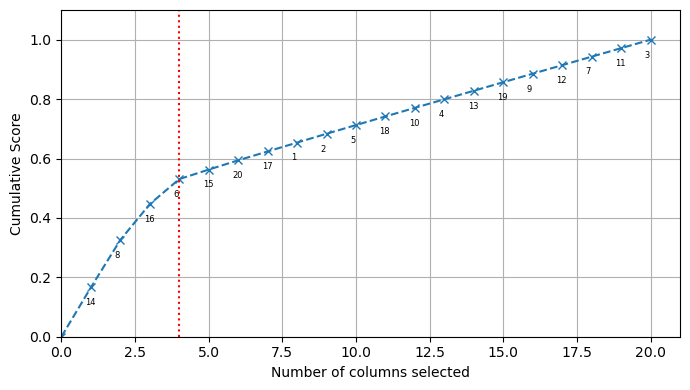

In [51]:
idxList, marginalInc = scoreMethod4(W)

cumMarginalInc = np.cumsum(marginalInc / np.sum(marginalInc)) 
tempIdxs = findUniqueIndexes(unique_idxs, idxList)

# if ax is None:
plt.figure(figsize=(7, 4))
ax = plt.gca()


ax.plot(range(len(idxList) + 1), np.concatenate(([0], cumMarginalInc)), '--x', label='Column Index')
ax.axvline(x=max(tempIdxs) + 1, color='r', linestyle=':')
# for idx in tempIdxs:
#     ax.scatter(idx + 1, cumMarginalInc[idx], color='red', label='Unique Index') 

ax.set_xlim(0, len(idxList) + 1)
ax.set_ylim(0, max(cumMarginalInc) + 0.1)

ax.grid()
# ax.set_xticks(range(len(idxList) + 1))
# ax.set_xticklabels([''] + list(np.array(idxList) + 1))
for i in range(len(idxList)):
    ax.text(i + 1 -0.2, cumMarginalInc[i] - 0.06, idxList[i] + 1, fontsize=6)



# ax.set_title(r'Score Function A = $1 - \frac{\| \bar{M} - w_ih^i \|_F}{\| \bar{M} \|_F}$ where $\bar{M} = M - \sum_{j \in S}w_jh^j$', fontsize=14)
ax.set_xlabel('Number of columns selected')
ax.set_ylabel('Cumulative Score')

plt.tight_layout()
# plt.savefig('postsonnmf_swimmer_a.pdf')

In [52]:
import pandas as pd

In [53]:
df = pd.DataFrame.from_dict({'index': idxList + 1, 'score': marginalInc})
df.to_csv('marginal_increase_urban.csv', index=False)

In [54]:
from scipy.io import savemat

savemat('marginal_increase_urban.mat', {'index': idxList+1, 'score': marginalInc})
